In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, max_error
from sklearn.neighbors import KNeighborsClassifier



# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [ ]:
df.describe().T

In [ ]:
sns.heatmap(df.corr(), cmap='RdYlGn')

In [ ]:
# Set features. This will also be used as your x values.
selected_features = df[["koi_period","koi_period_err1","koi_period_err2","koi_time0bk","koi_time0bk_err1",
                     "koi_steff_err2","koi_slogg","koi_slogg_err1","koi_slogg_err2","koi_srad",
                     "koi_srad_err1","koi_srad_err2","ra","dec","koi_kepmag"]]

In [ ]:
selected_features.corr()

In [ ]:
sns.heatmap(selected_features.corr(), cmap='RdYlGn')

In [ ]:
# Check for null values
df.info(verbose=True)

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
sns.countplot(df['koi_disposition'])

# Create a Train Test Split

Use `koi_disposition` for the y values

In [3]:
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]
print("Shape: ", X.shape, y.shape)


Shape:  (6991, 40) (6991,)


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [5]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
4002,0,0,1,0,99.673478,3.463000e-04,-3.463000e-04,219.334830,0.002300,-0.002300,...,-148,4.777,0.040,-0.027,0.492,0.026,-0.027,293.05801,45.248821,15.801
4246,0,1,0,0,0.592244,9.000000e-08,-9.000000e-08,131.654831,0.000124,-0.000124,...,-146,4.664,0.056,-0.032,0.591,0.045,-0.045,290.28094,45.464260,15.653
548,0,1,1,0,9.991625,5.360000e-06,-5.360000e-06,137.447816,0.000445,-0.000445,...,-176,4.338,0.153,-0.187,1.096,0.309,-0.206,301.04239,45.022888,14.039
3953,0,1,0,0,178.412990,3.100000e-05,-3.100000e-05,218.225235,0.000127,-0.000127,...,-134,4.346,0.084,-0.126,1.148,0.202,-0.124,288.32785,38.627621,13.944
2362,0,0,0,0,45.294223,5.600000e-05,-5.600000e-05,138.678725,0.000987,-0.000987,...,-68,4.347,0.030,-0.030,1.044,0.057,-0.042,285.67938,50.241299,10.961


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [6]:
# scale the data
X_scaler = MinMaxScaler().fit(X_train)


In [7]:
# normalise the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model



In [37]:
# loop through different k values to see which has the highest accuracy using odd numbers to ensure no ties
train_scores = []
test_scores = []
error_rates = []

for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred_k = model.predict(X_test_scaled)
    error_rates.append(np.mean(pred_k != y_test))
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    error_rate = np.mean(pred_k != y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f} Error Rate: {error_rate:.3f}")

k: 1, Train/Test Score: 1.000/0.796 Error Rate: 0.204
k: 3, Train/Test Score: 0.896/0.810 Error Rate: 0.190
k: 5, Train/Test Score: 0.873/0.825 Error Rate: 0.175
k: 7, Train/Test Score: 0.869/0.819 Error Rate: 0.181
k: 9, Train/Test Score: 0.857/0.820 Error Rate: 0.180
k: 11, Train/Test Score: 0.850/0.820 Error Rate: 0.180
k: 13, Train/Test Score: 0.849/0.817 Error Rate: 0.183
k: 15, Train/Test Score: 0.846/0.817 Error Rate: 0.183
k: 17, Train/Test Score: 0.842/0.814 Error Rate: 0.186
k: 19, Train/Test Score: 0.838/0.816 Error Rate: 0.184
k: 21, Train/Test Score: 0.837/0.818 Error Rate: 0.182
k: 23, Train/Test Score: 0.834/0.815 Error Rate: 0.185
k: 25, Train/Test Score: 0.833/0.812 Error Rate: 0.188
k: 27, Train/Test Score: 0.831/0.811 Error Rate: 0.189
k: 29, Train/Test Score: 0.830/0.813 Error Rate: 0.187
k: 31, Train/Test Score: 0.829/0.815 Error Rate: 0.185
k: 33, Train/Test Score: 0.829/0.819 Error Rate: 0.181
k: 35, Train/Test Score: 0.829/0.818 Error Rate: 0.182
k: 37, Train/Te

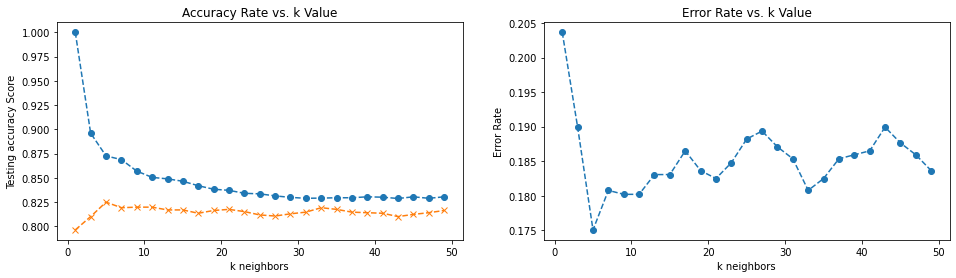

In [63]:
# plot data
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
ax1.plot(range(1, 50, 2), train_scores, linestyle="dashed", marker="o")
ax1.plot(range(1, 50, 2), test_scores, linestyle="dashed", marker="x")
ax2.plot(range(1, 50, 2), error_rates, linestyle="dashed", marker="o")
ax1.set_title("Accuracy Rate vs. k Value")
ax1.set_xlabel("k neighbors")
ax1.set_ylabel("Testing accuracy Score")
ax2.set_title("Error Rate vs. k Value")
ax2.set_xlabel("k neighbors")
ax2.set_ylabel("Error Rate")
plt.show()

In [ ]:
# Retrain model with k:33 which provides the best accuracy and is where the classifier starts to stablize
model = KNeighborsClassifier(n_neighbors=33)
model.fit(X_train_scaled, y_train)


In [ ]:
# predict test data set
y_pred = model.predict(X_test_scaled)


In [ ]:
# check performance of model accuracy scores of model
print(f"Training Data Score: {model.score(X_train_scaled, y_train):.4f}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test):.4f}")


# check performance of model with classification report
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
n_range = []

for i in range(1,50,2):
    n_range.append(i)

# define grid search
param_grid = {'n_neighbors': n_range, 
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan', 'minkowski']}


In [ ]:
grid = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 3)


In [ ]:
# Train the model with GridSearch (cross validate to determine hyper parameter values for best accuracy)
grid.fit(X_train_scaled, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

In [ ]:
print(f"Training Data Score: {grid.score(X_train_scaled, y_train):.4f}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test):.4f}")

In [ ]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [ ]:
# check performance of model with classification report
print(classification_report(y_test, predictions))

In [ ]:
confusion_matrix(y_test, predictions)
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash

filename = 'your_name.sav'
joblib.dump(your_model, filename)